## **Banana Quality Project**

### **About the dataset**

#### &emsp; The tabular dataset holds numerical attributes describing the quality of bananas, including their size, weight, sweetness (Brix), acidity (pH), softness, harvest time, and ripeness. 

### **Dataset Columns**

#### &emsp; **Size** - Size of bananas in cm
#### &emsp; **Weight** - Weight of bananas in gr
#### &emsp; **Sweetness** - Sweetness level in Brix
#### &emsp; **Softness** - Softness of fruit
#### &emsp; **HarvestTime** - Amount of time from harvesting
#### &emsp; **Ripeness** - Ripeness of fruit
#### &emsp; **Acidity** - Acidity level (pH)
#### &emsp; **Quality** - Quality of fruit

### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import random
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **Loading Data**

In [3]:
bananaData = pd.read_csv("Dataset/banana_quality.csv")
print("Dimension of the dataset:", bananaData.shape)

Dimension of the dataset: (8000, 8)


#### &emsp; The dataset holds 8000 sample distributed in the following features: Size, 		Weight, Sweetness, Softness, Harvest Time, Ripeness, Acidity, and Quality.

### **Data Exploration**

##### We explore the data in order to know whether find null, duplicated values, or errors in th the data types. We apply python functions such as describe(), info(), isna() for going through our dataset.

#### **Getting the columns and data types**

In [4]:
bananaData.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [5]:
bananaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


#### **Observing null and duplicated values**

In [6]:
bananaData.isna().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [7]:
bananaData.duplicated().sum()

0

##### According to the graph we concluded the dataset does not contain any null value.

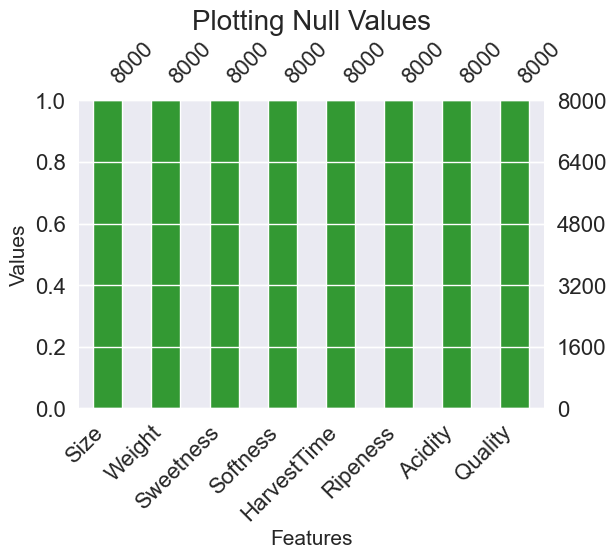

In [8]:
sns.set(style="darkgrid", palette="deep")
plt.title("Plotting Null Values", fontsize=20)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Values", fontsize=15)
msno.bar(bananaData, figsize=(6,4), color=(0.20,0.60,0.20))
plt.show()

#### **Selecting the features and target**

In [9]:
features = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
target = 'Quality'

In [10]:
print("Target Data Distribution")
bananaData[target].value_counts()

Target Data Distribution


Quality
Good    4006
Bad     3994
Name: count, dtype: int64

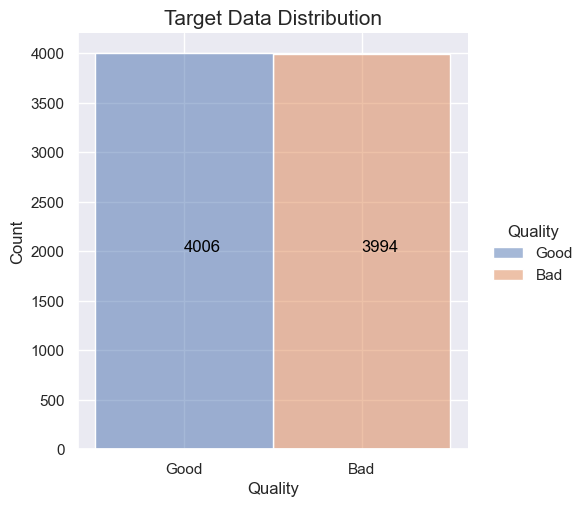

In [11]:
sns.set(style="darkgrid", palette="deep")
sns.displot(data=bananaData, x="Quality", hue="Quality")

plt.title("Target Data Distribution", fontsize=15)
annot = bananaData[target].value_counts()
for index, value in enumerate(annot):
    plt.text(x=index, y=2000, s=value, color="black")

plt.grid(True)
plt.show()

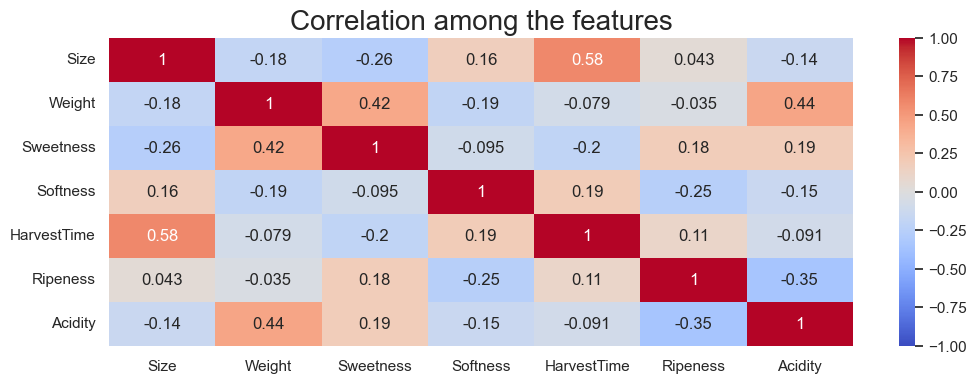

In [12]:
plt.figure(figsize=(12,4))
plt.title("Correlation among the features", fontsize=20)
heatmap = sns.heatmap(bananaData[features].corr(), vmax=1, vmin=-1, annot=True, cmap='coolwarm')
plt.show()

#### **Analysing and Plotting the features**

In [25]:
bananaData

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


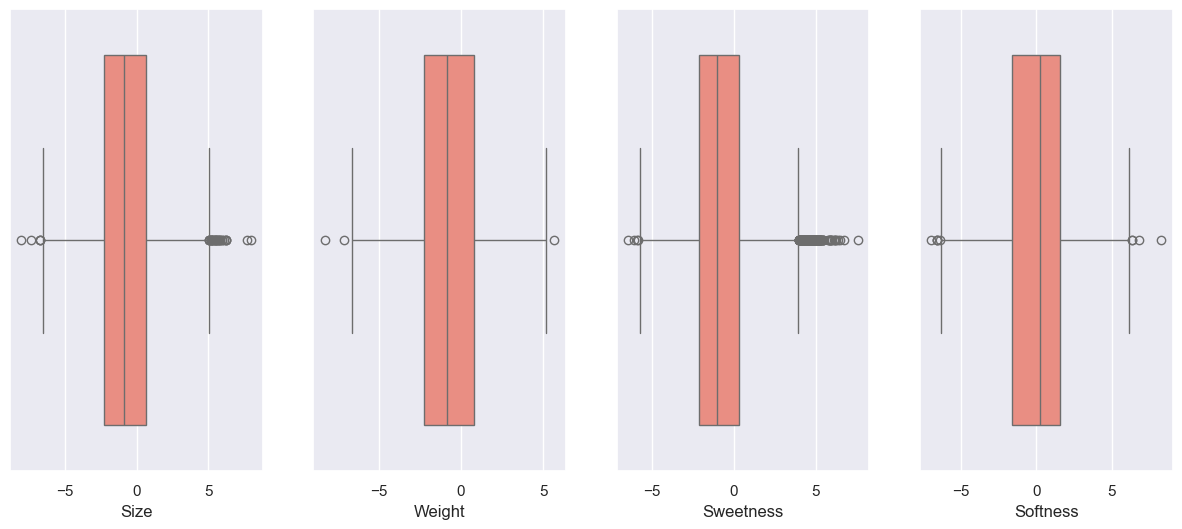

In [34]:
sns.set(style="darkgrid", palette="deep")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,6))
for i in range(4):
    sns.boxplot(data=bananaData, x=features[i], ax=axes[i], color="salmon")
plt.show()

### **Scaling the features**

#### &emsp; PCA is affected by scale, so we need to scale the features in the data before applying PCA. we will apply the *StandardScaler()* from *sklearn.preprocessing*, this function to help us to scale the data set’s features onto unit scale (mean = 0 and variance = 1), which is a requirement for the best performance of many machine learning algorithms.

In [14]:
x_scaled = StandardScaler().fit_transform(x)
x_scaled.shape

NameError: name 'x' is not defined

In [ ]:
print(x_scaled)

[[-0.55113643  0.60972933  1.97505067 ...  0.52395094  0.78256769
   0.11449116]
 [-0.77810662  0.61905159  0.57338529 ... -0.07058475  0.60849327
   0.13020408]
 [ 0.18268513  1.11329814  1.20034726 ...  0.05210072  1.09241877
   0.61857695]
 ...
 [ 1.01621574 -0.56882668 -0.90443461 ...  0.09462033 -1.237308
   0.30027865]
 [-0.64802151 -0.98302025 -0.12205536 ... -0.0257164  -2.06293293
   0.18089199]
 [-0.895682   -0.63679029  0.47694643 ... -0.41600452 -1.12903488
   0.62220587]]


### **Analysing how many principal components we need to choose for the analysis.**

#### &emsp; To know the number of principal components that we will need in the dataset we will apply PCA, using the explained variance ratio I can see the percentages of the variance in each principal component.

In [ ]:
pca = PCA()
pca.fit_transform(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance_ratio)
explained_varianceDF = pd.DataFrame([explained_variance_ratio, cum_explained_variance], index=['Explained Variance', 'Cumulative'])
print(explained_varianceDF.T)

   Explained Variance  Cumulative
0            0.307998    0.307998
1            0.200044    0.508042
2            0.180337    0.688380
3            0.130734    0.819113
4            0.067806    0.886920
5            0.061447    0.948367
6            0.051633    1.000000


#### &emsp; The first component makes up for around 31% of the explained variance. This is relatively low because for this particular case I want to reduce the data’s dimensionality and keep at least 80% variance of the original data so then I must include three components to reach at least 80% and even have around 82% of explained variance covered for this case.

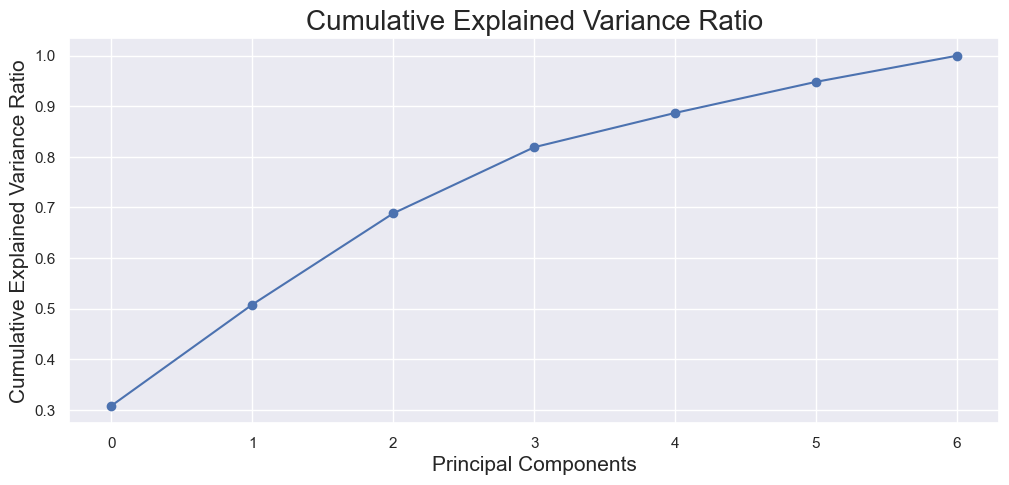

In [ ]:
figure = plt.figure(figsize=(12,5))
ax = figure.add_subplot(1,1,1)
ax.set_title("Cumulative Explained Variance Ratio", fontsize=20)
ax.set_xlabel("Principal Components", fontsize=15)
ax.set_ylabel("Cumulative Explained Variance Ratio", fontsize=15)
ax.plot(cum_explained_variance, linestyle="-", marker="o")
ax.grid(True)

### **Applying PCA for three components**

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_scaled)
principalComponentsDF = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
principalComponentsDF

,PC1,PC2,PC3
0,1.330430,-1.002280,-1.316232
1,1.260413,-0.934781,-0.495969
2,1.425380,-0.917234,-1.690161
3,1.388760,-0.559406,-1.158999
4,1.086714,0.460326,-1.109329
...,...,...,...
7995,1.774965,0.991603,0.436885
7996,-0.619122,1.728019,0.776756
7997,-1.089930,1.438835,0.431576
7998,-0.279718,1.692000,1.594430


In [ ]:
# Show PCA characteristics
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', principalComponentsDF.shape)

Shape before PCA:  (8000, 7)
Shape after PCA:  (8000, 3)


In [ ]:
finalDF = pd.concat([principalComponentsDF, y.rename('Target')], axis=1)
finalDF

,PC1,PC2,PC3,Target
0,1.330430,-1.002280,-1.316232,Good
1,1.260413,-0.934781,-0.495969,Good
2,1.425380,-0.917234,-1.690161,Good
3,1.388760,-0.559406,-1.158999,Good
4,1.086714,0.460326,-1.109329,Good
...,...,...,...,...
7995,1.774965,0.991603,0.436885,Bad
7996,-0.619122,1.728019,0.776756,Bad
7997,-1.089930,1.438835,0.431576,Bad
7998,-0.279718,1.692000,1.594430,Bad


In [ ]:
finalDF.shape

(8000, 4)

### **Visualising 3D projection for PCA**

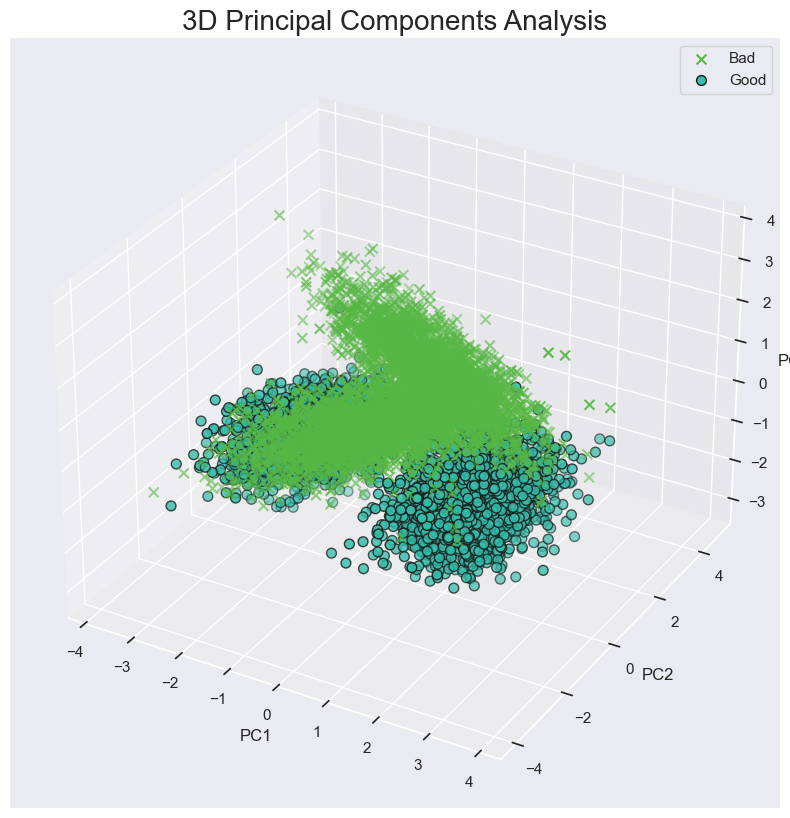

In [ ]:
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111, projection='3d')
ax.set_title("3D Principal Components Analysis", fontsize=20)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_zlabel('PC3', fontsize=12)
targets = set(finalDF['Target'])
colours = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for _ in range(len(targets))]

for target, colour in zip(targets, colours):
    indextokeep = finalDF['Target'] == target

    if target == "Good":
        ax.scatter(finalDF.loc[indextokeep,'PC1'],
                    finalDF.loc[indextokeep,'PC2'],
                    finalDF.loc[indextokeep,'PC3'],
                    s=50,
                    c=colour,
                    edgecolors='k',
                    marker='o')
    else:
        ax.scatter(finalDF.loc[indextokeep,'PC1'],
                    finalDF.loc[indextokeep,'PC2'],
                    finalDF.loc[indextokeep,'PC3'],
                    s=50,
                    c=colour,
                    marker='x')

ax.legend(targets)
ax.autoscale_view(60,40)
ax.grid(True)
plt.show()

#### &emsp; We can see that exits two different marked clusters in terms of the quality: the ‘good’ data which there is a part that is oriented to the PC2 and another one oriented to the PC1, nevertheless the ‘bad’ data is oriented to the centre above of the ‘good’ data taking an elevation in the z-axis corresponding to the PC3.

### **Computing PCA loadings and the loading matrix**

#### &emsp; To do this analysis we will take the concept of the loading matrix which show the contribution of each original feature to the principal components.
#### &emsp; **Positive or negative:** direction of the relationship. 
#### &emsp; **Higher absolute values:** stronger contribution to principal components.

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'])
loadings_df['Features'] = features
loadings_df = loadings_df.set_index('Features')
loadings_df

,PC1,PC2,PC3
Features,,,
Size,-0.682587,0.183361,-0.508922
Weight,0.660983,0.196600,-0.514312
Sweetness,0.613358,-0.204087,-0.338758
Softness,-0.412317,0.433966,0.194892
HarvestTime,-0.618015,0.180507,-0.629053
Ripeness,-0.087870,-0.841523,-0.359375
Acidity,0.563522,0.597902,-0.247793


In [ ]:
loadings[:,0]

array([-0.68258677,  0.66098344,  0.61335819, -0.41231734, -0.61801529,
       -0.08787029,  0.5635219 ])

### **Visualising 2D Loading Matrix and Principal Components**

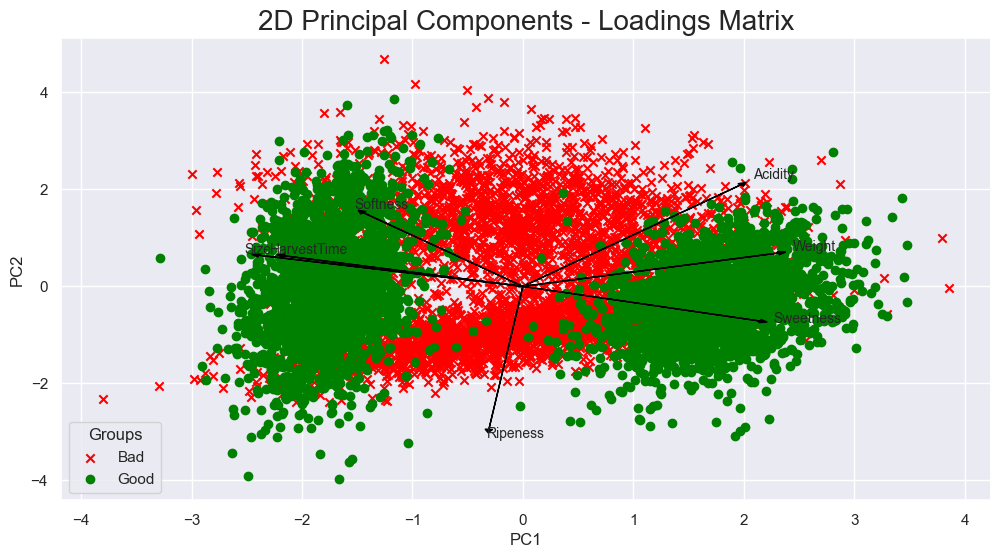

In [ ]:
figure = plt.figure(figsize=(12,6))
ax = figure.add_subplot(1,1,1)
ax.set_title("2D Principal Components - Loadings Matrix", fontsize=20)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
targets = set(finalDF['Target'])

for target in targets:
    indextokeep = finalDF['Target'] == target

    if target == "Good":
        ax.scatter(finalDF.loc[indextokeep,'PC1'],
                    finalDF.loc[indextokeep,'PC2'],
                    c='green',
                    marker='o')
    else:
        ax.scatter(finalDF.loc[indextokeep,'PC1'],
                    finalDF.loc[indextokeep,'PC2'],
                    c='red',
                    marker='x')

for i, values in enumerate(features):
        ax.arrow(
            0, 0, # coordinates of arrow base
            loadings[i,0]*3.5, # length of the arrow along x
            loadings[i,1]*3.5, # length of the arrow along y
            color='black', 
            head_width = 0.07,
            head_length = 0.07
            )
        ax.text(loadings[i,0]*3.7, loadings[i,1]*3.7, values, fontsize=10)

ax.legend(targets, loc = 'lower left', title ='Groups')

plt.show()

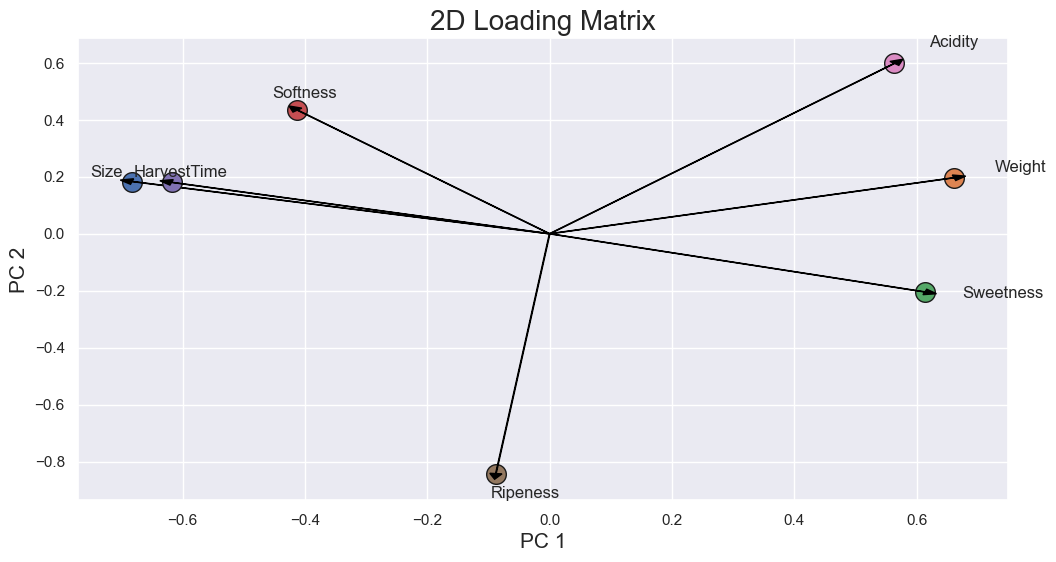

In [ ]:
figure = plt.figure(figsize=(12,6))
ax = figure.add_subplot(1,1,1)
ax.set_title("2D Loading Matrix", fontsize=20)
ax.set_xlabel("PC 1", fontsize=15)
ax.set_ylabel("PC 2", fontsize=15)

for i, values in enumerate(features):
    ax.scatter(loadings[i,0], loadings[i,1], s=200, edgecolors='k')
    ax.arrow(
        0, 0, # coordinates of arrow base
        loadings[i,0], # length of the arrow along x
        loadings[i,1], # length of the arrow along y
        color='black', 
        head_width = 0.02,
        head_length = 0.02
        )
    ax.text(loadings[i,0]*1.1, loadings[i,1]*1.1, values)
ax.grid(True)
plt.show()

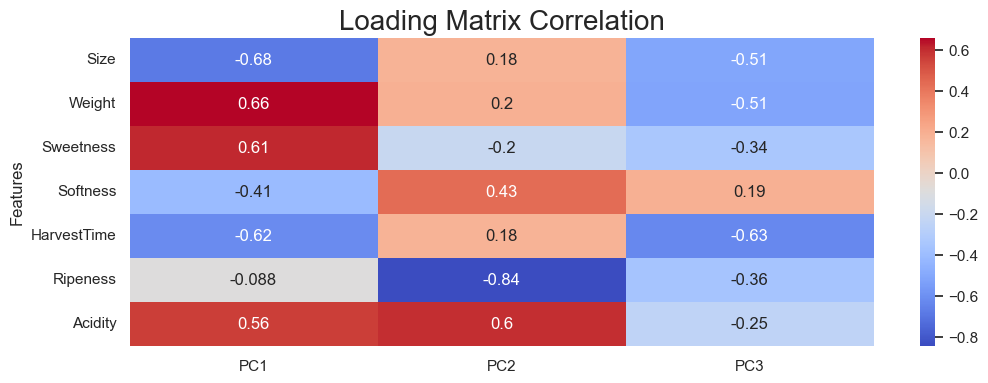

In [ ]:
n_pc = 3
plt.figure(figsize=(12,4))
plt.title("Loading Matrix Correlation", fontsize=20)
sns.heatmap(loadings_df.iloc[:,:n_pc], annot=True, cmap="coolwarm")
plt.show()

### **Conclusion:**

#### &emsp; To sum up we can conclude the data related to the good quality is divided in two groups, one part is related to the PC1 given by the variable's acidity, weight, sweetness, and on the other hand the second part is related to the PC2 given by the variable's size, softness, and harvest Time. However, the data related to the bad quality is more related to the PC3 given by the variable ripeness.

#### &emsp; For this study case the analysis allow us to know what the best conditions are to harvest any fruit depends on the general variables that all the fruits have. We can determine the perfect harvest time if only to get fruit, for instance with good acidity and weight or softness and sweetness. 
#### &emsp; In conclusion this analysis is especially useful to have a global knowledge to obtain a product with excellent quality.